In [37]:
#import json
import numpy as np
import pandas as pd
dir_name = "userAction_Recommendation/"
file_name1 = "boston.csv"
boston_info = pd.read_csv(dir_name + file_name1)
#print(boston_info.head())
file_name2 = "columbus.csv"
columbus_info = pd.read_csv(dir_name + file_name2)
file_name3 = "review_boston.csv"
review_bos = pd.read_csv(dir_name + file_name3)
file_name4 = "review_columbus.csv"
review_col = pd.read_csv(dir_name + file_name4)
#data cleaning
print(len(review_bos))
review_bos = review_bos.drop(review_bos[review_bos.user_id == '#NAME?'].index) 
review_bos = review_bos.drop(review_bos[review_bos.user_id == '#VALUE!'].index)
review_bos = review_bos.drop(review_bos[review_bos.business_id == '#NAME?'].index)
review_bos = review_bos.drop(review_bos[review_bos.business_id == '#VALUE!'].index)
review_bos = review_bos.drop(review_bos[review_bos.review_id == '#NAME?'].index)
review_bos = review_bos.drop(review_bos[review_bos.review_id == '#VALUE!'].index)
print(len(review_bos))
#review_bos = review_bos.dropna(subset = ['labels'])

755306
727571


In [38]:
from sklearn.cluster import DBSCAN
X = np.array((boston_info.latitude,boston_info.longitude))
X = X.transpose()
#print(X.shape)
clustering = DBSCAN(eps = 0.004, min_samples = 2).fit(X)
print(clustering.labels_)

[ 0  1  0 ... 39  0  0]


No handles with labels found to put in legend.


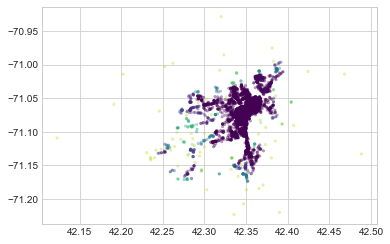

In [39]:
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
x_points = X[:, 0]
y_points = X[:, 1]
labels = clustering.labels_
colormap = cm.viridis
color_labels = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, max(labels)+1)]
color_list = [color_labels[j] for j in labels]
#print(color_list)
plt.scatter(x_points,y_points,c = color_list, s=5, alpha=0.3)
plt.legend()
plt.show()

In [40]:
labels = clustering.labels_
print(max(labels))

45


In [41]:
print(review_bos.labels)
#print(review_bos[0:1])
boston_info['labels'] = labels
print(len(boston_info))
print(boston_info.head())
boston_info = boston_info.dropna(subset = ['labels'])
print(len(boston_info))

0        NaN
1        NaN
3        NaN
4        NaN
5        NaN
          ..
755300   NaN
755302   NaN
755303   NaN
755304   NaN
755305   NaN
Name: labels, Length: 727571, dtype: float64
8263
              business_id                                         categories  \
0  hcRxdDg7DYryCxCoI8ySQA            Restaurants, Shopping, Shopping Centers   
1  jGennaZUr2MsJyRhijNBfA  Sandwiches, Food, Restaurants, Breakfast & Bru...   
2  iPD8BBvea6YldQZPHzVrSQ  Creperies, Restaurants, Food, Coffee & Tea, Br...   
3  WuoNSCjFBH4OQTSNGc4l6w  Beauty & Spas, Hair Salons, Active Life, Day Spas   
4  zHMsnpMPanzRx-A6AwGSdw  Day Spas, Tanning, Hair Stylists, Massage, Spr...   

     city   latitude  longitude                              name  stars  \
0  Boston  42.338544 -71.106842                 Longwood Galleria    2.5   
1  Boston  42.363442 -71.025781                   Legal Sea Foods    3.5   
2  Boston  42.342673 -71.084239                   Espresso Minute    4.5   
3  Boston  42.350004 -

In [46]:
#每一个用户ID生成一个linkedlist，每个linkedlist就是一串商家的聚类名按照日期排列
class Node:
    def __init__(self, dataval = None, date = None):
        self.dataval = dataval
        self.date = date
        #next指向下一个node
        self.next = None
class LinkedList:
    def __init(self):
        self.head = None
    def add(self, NewNode):
        if self.head is None:
            self.head = NewNode
            return
        last_node = self.head
        while(last_node.next):
            last_node = last_node.next
        last_node.next = NewNode
    def insert(self, NewNode):
        if self.head is None:
            self.head = NewNode
            return
        pre_node = self.head
        while(pre_node.next):
            cur_node = pre_node.next
            if cur_node.date > NewNode.date:
                #insert node
                NewNode.next = cur_node
                pre_node.next = NewNode
                return 
            pre_node = pre_node.next
        pre_node.next = NewNode
    def printlist(self):
        printval = self.head
        print('->',end = "")
        while printval is not None:
            print(printval.dataval, ' -> ',end = "")
            printval = printval.next
        print('None')
    def get_list(self):
        list = []
        node = self.head
        while node is not None:
            list.append(node.dataval)
            node = node.next
        self.list = list
    def get_freq(self):
        self.get_list(self)
        dict = {}
        for value, count in enumerate(self.list):
            dict[value] = count
        self.dict = dict

In [47]:
import math
users = {}
Labels = np.array([boston_info.business_id, boston_info.labels])
Labels = Labels.transpose()
user_label = []
dict_label = dict(zip(Labels[:,0],Labels[:,1]))
#insert label column in review_bos
count = 0
for i in range(len(review_bos)):
    review = review_bos.iloc[i]
    #print(review.business_id)
    if(review.business_id == "nan"):
        user_label.append(0)
        count += 1
    elif(review.business_id not in dict_label.keys()):
        user_label.append(0)
        count += 1
    else:
        #print(dict_label[review.business_id])
        user_label.append(dict_label[review.business_id])
print(count)
review_bos.labels = user_label
#create linkedlist
for i in range(len(review_bos)):
    review = review_bos.iloc[i]
    #print(review['user_id'])
    user_id = review['user_id']
    #user_id = review.user_id.astype('str').astype('string')
    #user_id = review['user_id'].astype(str)
    #user_id = str(user_id)
    #print(user_id)
    if user_id not in users:
        #user_id = review.user_id
        node = Node(review.labels, review.date)
        users[user_id] = LinkedList()
        users[user_id].head = node
    else:
        #user_id = review.user_id
        node = Node(review.labels, review.date)
        users[user_id].insert(node)
print(len(users))

3
265642


In [49]:
#print前10个user的linked list
j = 0
for i in users:
    if j < 10:
        users[i].printlist()
    j+=1
        

->0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> None
->0  -> None
->0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 1  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> -1  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> None
->0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 1  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> None
->0  -> 0  -> 0  -> 0  -> 0  -> 0  -> 0  -> None
->9  -> 0  -> 0  -> 0  -> 0 

In [54]:
#make networkx
import networkx as nx
import pylab
count = 0
for i in users:
    if count < 10:
        G = nx.DiGraph()
        cur_node = users[i].head
        if cur_node.next is None:
            G.add_node(cur_node.dataval)
        else:
            add_list = []
            weights = []
            dict_node = {}
            dict_node[cur_node.dataval] = 1
            while cur_node.next is not None:
                edge = [(cur_node.dataval, cur_node.next.dataval)]
                if edge in add_list:
                    p = add_list.index(edge)
                    weights[p] += 1
                else:
                    add_list.append(edge)
                    weights.append(1)
            for i in range(len(weights)):
                G.add_edges_from(add_list[1][:], weight = weights[i])
        pos = nx.spring_layout(G)
        nx.draw(G, pos)
        pylab.show()
        count += 1
    else:
        break

KeyboardInterrupt: 

In [60]:
#test
G = nx.DiGraph()
i = "99RsBrARhhx60UnAC4yDoA"
cur_node = users[i].head
users[i].printlist()
if cur_node.next is None:
    G.add_node(cur_node.dataval)
else:
    add_list = []
    weights = []
    dict_node = {}
    dict_node[cur_node.dataval] = 1
    while cur_node.next is not None:
        edge = [(cur_node.dataval, cur_node.next.dataval)]
        if edge in add_list:
            p = add_list.index(edge)
            weights[p] += 1
        else:
            add_list.append(edge)
            weights.append(1)
        cur_node = cur_node.next
    for i in range(len(weights)):
        G.add_edges_from(add_list[1][:], weight = weights[i])
pos = nx.spring_layout(G)
nx.draw(G, pos)
pylab.show()

->0  -> None


NetworkXError: random_state_index is incorrect